In [55]:
# 2 Paquetes y lectura de las 15 fotos de training de 23 personas
# (4 de ellas externas a la maestría)

import numpy as np
import cv2
import os
import random
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
import math
import matplotlib.pyplot as plt
from mlxtend.preprocessing import standardize

input_dir2 = '.\\trainn'

train_img = []
train_label = []
train_label_num = []
labels_unicos_num = []
labels_unicos_texto = []

cont = 0
cant = 0
labels_unicos_texto.append("ad_")
labels_unicos_num.append(cont)
for filename in sorted(os.listdir(input_dir2)):
    temp = filename[0:3]
    cant += 1
    input_path = os.path.join(input_dir2, filename)
    if (cant > 1):
        if (filename[0:3] != train_label[-1]):
            cont += 1
            labels_unicos_texto.append(filename[0:3])
            labels_unicos_num.append(cont)
    train_label.append(filename[0:3])
    train_label_num.append(cont)
    img = cv2.imread(input_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    train_img.append(img)

train_img_array = np.array(train_img)
#train_label_num.append(22)

print(train_img_array.shape)

print(train_label)

print(len(train_label))

print(train_label_num)

print(len(train_label_num))

print(labels_unicos_num)

print(labels_unicos_texto)



(375, 90, 90)
['ad_', 'ad_', 'ad_', 'ad_', 'ad_', 'ad_', 'ad_', 'ad_', 'ad_', 'ad_', 'ad_', 'ad_', 'ad_', 'ad_', 'ad_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'cp_', 'ec_', 'ec_', 'ec_', 'ec_', 'ec_', 'ec_', 'ec_', 'ec_', 'ec_', 'ec_', 'ec_', 'ec_', 'ec_', 'ec_', 'ec_', 'ef_', 'ef_', 'ef_', 'ef_', 'ef_', 'ef_', 'ef_', 'ef_', 'ef_', 'ef_', 'ef_', 'ef_', 'ef_', 'ef_', 'ef_', 'ep_', 'ep_', 'ep_', 'ep_', 'ep_', 'ep_', 'ep_', 'ep_', 'ep_', 'ep_', 'ep_', 'ep_', 'ep_', 'ep_', 'ep_', 'fl_', 'fl_', 'fl_', 'fl_', 'fl_', 'fl_', 'fl_', 'fl_', 'fl_', 'fl_', 'fl_', 'fl_', 'fl_', 'fl_', 'fl_', 'hg_', 'hg_', 'hg_', 'hg_', 'hg_', 'hg_', 'hg_', 'hg_', 'hg_', 'hg_', 'hg_', 'hg_', 'hg_', 'hg_', 'hg_', 'ja_', 'ja_', 'ja_', 'ja_', 'ja_', 'ja_', 'ja_', 'ja_', 'ja_', 'ja_', 'ja_', 'ja_', 'ja_', 'ja_', 'ja_', 'jm_', 'jm_', 'jm_', 'jm_', 'jm_', 'jm_', 'jm_', 'jm_', 'jm_', 'jm_', 'jm_', 'jm_', 'jm_'

In [56]:
# 3 lectura de las 3 fotos de testing de 23 personas
# (4 de ellas externas a la maestría)


input_dir2 = '.\\testt'

test_img = []
test_label = []
test_label_num = []


cont = 0
cant = 0
for filename in sorted(os.listdir(input_dir2)):
    temp = filename[0:3]
    cant += 1
    input_path = os.path.join(input_dir2, filename)
    if (cant > 1):
        if (filename[0:3] != test_label[-1]):
            cont += 1
    test_label.append(filename[0:3])
    test_label_num.append(cont)
    img = cv2.imread(input_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    test_img.append(img)

#test_label_num.append(22)
test_img_array = np.array(test_img)

print(test_img_array.shape)

print(test_label)

print(len(test_label))

print(test_label_num)

print(len(test_label_num))

(69, 90, 90)
['ad_', 'ad_', 'ad_', 'cp_', 'cp_', 'cp_', 'ec_', 'ec_', 'ec_', 'ef_', 'ef_', 'ef_', 'ep_', 'ep_', 'ep_', 'fl_', 'fl_', 'fl_', 'hg_', 'hg_', 'hg_', 'ja_', 'ja_', 'ja_', 'jm_', 'jm_', 'jm_', 'lm_', 'lm_', 'lm_', 'md_', 'md_', 'md_', 'mg_', 'mg_', 'mg_', 'mk_', 'mk_', 'mk_', 'ml_', 'ml_', 'ml_', 'mp_', 'mp_', 'mp_', 'mt_', 'mt_', 'mt_', 'ndl', 'ndl', 'ndl', 'ob_', 'ob_', 'ob_', 'rbe', 'rbe', 'rbe', 'rd_', 'rd_', 'rd_', 're_', 're_', 're_', 'sp_', 'sp_', 'sp_', 'ss_', 'ss_', 'ss_']
69
[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22]
69


In [57]:
# 5 Las fotos se pasan de matrices de 30 x 30 a vectores de 8100 componentes

temp = []

for i in range(len(train_label)):  
    temp.append(train_img_array[i,:,:].flatten())

train_img_array_flatten = np.array(temp)

print(train_img_array_flatten.shape)


temp = []

for i in range(len(test_label)):  
    temp.append(test_img_array[i,:,:].flatten())

test_img_array_flatten = np.array(temp)

print(test_img_array_flatten.shape)

(375, 8100)
(69, 8100)


In [58]:
# 6 pasamos de rango 0-255 a 0-1 por cuestiones numéricas

# Change integers to 32-bit floating point numbers
train_img_array_flatten = train_img_array_flatten.astype('float64')

train_img_array_flatten = train_img_array_flatten/255.0

# Change integers to 32-bit floating point numbers
test_img_array_flatten = test_img_array_flatten.astype('float64')

test_img_array_flatten = test_img_array_flatten/255.0




In [59]:
# 7 Se ejecuta PCA y se calcula la cantidad de componentes
# que explican el 90% de variabilidad 

pca = PCA(n_components=.9, svd_solver = 'full')
pca.fit(train_img_array_flatten)

print(f'Nro de componentes a utilizar en el PCA : {pca.n_components_}')

Nro de componentes a utilizar en el PCA : 100


In [60]:
# 9 Se transforman al subespacio de componentes principales las fotos de training y de 
# testing, quedando cada foto con tantas variables como componentes

print(train_img_array_flatten.shape)

train_pca = pca.transform(train_img_array_flatten)
test_pca = pca.transform(test_img_array_flatten)


print(f'train_img shape : {train_pca.shape}')
print(f'test_img shape : {test_pca.shape}')

(375, 8100)
train_img shape : (375, 100)
test_img shape : (69, 100)


In [61]:
# 10 definición arquitectura RN con Tensorflow y Keras
# 1 o 2 capas ocultas, siempre función sigmoide de activación 

model = keras.models.Sequential()

model.add(keras.layers.InputLayer(input_shape=(test_pca.shape[1],)))

model.add(keras.layers.Dense(64, activation='sigmoid'))

#model.add(keras.layers.Dense(64, activation='sigmoid'))

model.add(keras.layers.Dense(len(labels_unicos_texto), activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                6464      
                                                                 
 dense_9 (Dense)             (None, 23)                1495      
                                                                 
Total params: 7,959
Trainable params: 7,959
Non-trainable params: 0
_________________________________________________________________


In [62]:
# 11 parámetros adicionales de la RN de Keras Tensorflow

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

early = keras.callbacks.EarlyStopping(patience=15, monitor='val_loss', restore_best_weights=True)

train_label_tensor = keras.utils.to_categorical(train_label_num,num_classes=len(labels_unicos_texto))

test_label_tensor = keras.utils.to_categorical(test_label_num,num_classes=len(labels_unicos_texto))

#print(test_label_tensor)

In [63]:
# 12 entrenamiento de la RN de Keras Tensorflow

ajuste = model.fit(epochs=300, x=train_pca, y=train_label_tensor, validation_data=(test_pca, test_label_tensor), callbacks=[early,])

Epoch 1/300
12/12 [==============================] - 1s 43ms/step - loss: 3.2923 - accuracy: 0.0667 - val_loss: 3.1391 - val_accuracy: 0.0000e+00
Epoch 2/300
12/12 [==============================] - 0s 7ms/step - loss: 3.0702 - accuracy: 0.0987 - val_loss: 3.0049 - val_accuracy: 0.0870
Epoch 3/300
12/12 [==============================] - 0s 7ms/step - loss: 2.9283 - accuracy: 0.1573 - val_loss: 2.8961 - val_accuracy: 0.1739
Epoch 4/300
12/12 [==============================] - 0s 6ms/step - loss: 2.8095 - accuracy: 0.2507 - val_loss: 2.7995 - val_accuracy: 0.2464
Epoch 5/300
12/12 [==============================] - 0s 6ms/step - loss: 2.7003 - accuracy: 0.3280 - val_loss: 2.7118 - val_accuracy: 0.2899
Epoch 6/300
12/12 [==============================] - 0s 7ms/step - loss: 2.6010 - accuracy: 0.4187 - val_loss: 2.6307 - val_accuracy: 0.3188
Epoch 7/300
12/12 [==============================] - 0s 7ms/step - loss: 2.5072 - accuracy: 0.4587 - val_loss: 2.5545 - val_accuracy: 0.3623
Epoch 8/

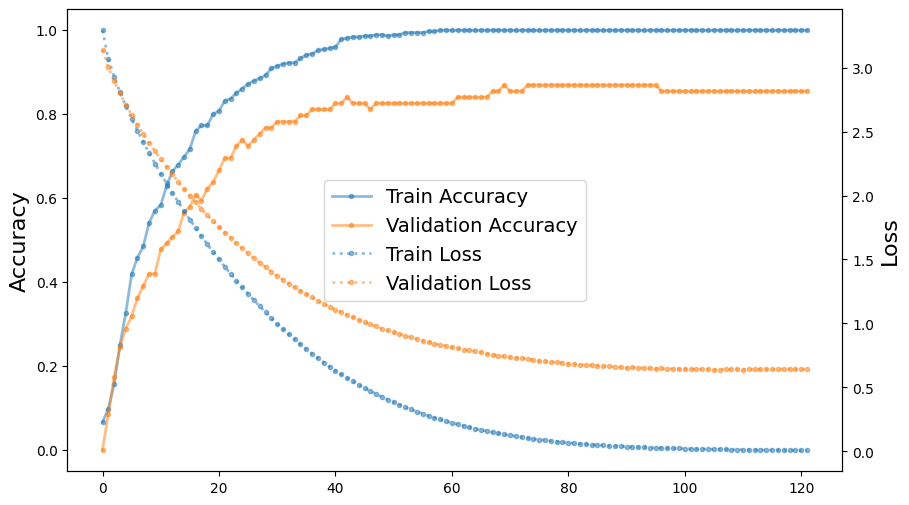

In [64]:
# 13 Gráfica de accuracies y losses sobre conjuntos de training y testing versus cantidad de iteraciones

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

kw = {'marker': '.', 'lw': 2, 'alpha': 0.5}
l0, = ax.plot(ajuste.history['accuracy'], label='Train Accuracy', **kw)
l1, = ax.plot(ajuste.history['val_accuracy'], label='Validation Accuracy', **kw)

ax2 = ax.twinx()
ll0, = ax2.plot(ajuste.history['loss'], ls=':', color='C0', label='Train Loss', **kw)
ll1, = ax2.plot(ajuste.history['val_loss'], ls=':', color='C1', label='Validation Loss', **kw)

ax.set_ylabel('Accuracy', fontsize=16)
ax2.set_ylabel('Loss', fontsize=16)

ax.legend(handles=[l0, l1, ll0, ll1], loc='center', fontsize=14)
# plt.legend(loc=0)

In [65]:
# 14 accuracy en el conjunto de testing de la RN de Tensorflow 

model.evaluate(test_pca, test_label_tensor)

3/3 [==============================] - 0s 3ms/step - loss: 0.6384 - accuracy: 0.8551


[0.6384217739105225, 0.8550724387168884]

In [66]:
# 15 Detalle en los aciertos de la RN en el conjunto de testing

# Calcular las predicciones y buscamos los casos con error
y_test = np.argmax(model.predict(test_pca), axis=1)

ierror = (y_test - test_label_num != 0)

# Cuántos hay
print('Hay {} errores en el conjunto de validación sobre un total de {} imagenes'.format(np.sum(ierror), len(test_pca)))

3/3 [==============================] - 0s 2ms/step
Hay 10 errores en el conjunto de validación sobre un total de 69 imagenes


In [67]:
# 16 Definiciones preliminares del algoritmo de Denicolay para RN con 1 capa oculta

#backpropagation

# backpropagation, just one hidden layer
# lo hago con  matrices de pesos
# puedo tener tantos inputs como quiera
# puedo tener tantas neuronas ocultas como quiera
# puedo tener tantas neuronas de salida como quiera
# fuera de este codigo esta la decision que tomo segun el valor de salida de cada neurona de salida

def func_eval(fname, x):
    match fname:
        case "purelin":
            y = x
        case "logsig":
            y = 1.0 / ( 1.0 + math.exp(-x) )
        case "tansig":
            y = 2.0 / ( 1.0 + math.exp(-2.0*x) ) - 1.0
    return y

func_eval_vec = np.vectorize(func_eval)

def deriv_eval(fname, y):  #atencion que y es la entrada y=f( x )
    match fname:
        case "purelin":
            d = 1.0
        case "logsig":
            d = y*(1.0-y)
        case "tansig":
            d = 1.0 - y*y
    return d

deriv_eval_vec = np.vectorize(deriv_eval)

entrada = train_pca
salida = train_label_tensor

#print(salida.shape)

# Paso las listas a numpy
X = np.array(entrada)
#Y = np.array(salida).reshape(len(X),1)
Y = np.array(salida)

#print(Y)

In [68]:
# 17 Algoritmo de Denicolay de RN con 1 capa oculta

filas_qty = len(X)
input_size = X.shape[1]   # 2 entradas
hidden_size = 64 # neuronas capa oculta
output_size = len(labels_unicos_texto)  # 1 neurona





# Paso las listas a numpy
#X = train_pca
#print(X.shape)

#Y = np.array(train_label_num).reshape(len(X),1)

#labels_np = np.array(labels_unicos_num).reshape(len(labels_unicos_num),1)

#print(labels_np.shape)

#print(Y.shape)


#filas_qty = len(X)
#input_size = X.shape[1]   # 97 entradas
#hidden_size = 64  # neuronas capa oculta
#output_size = labels_np.shape[0]  # 23 neuronas

#print(X.shape)
#print(Y.shape)
print('Red Neuronal')
print(f'Capa de entrada: {input_size}')
print(f'Capa oculta: {hidden_size}')
print(f'Capa de salida: {output_size}')



# defino las funciones de activacion de cada capa
hidden_FUNC = 'logsig'  # uso la logistica
output_FUNC = 'logsig'  # uso la tangente hiperbolica

# incializo los graficos
#grafico = perceptron_plot(X, np.array(salida), 0.0)


# Incializo las matrices de pesos azarosamente
# W1 son los pesos que van del input a la capa oculta
# W2 son los pesos que van de la capa oculta a la capa de salida
W1 = np.random.uniform(-0.5, 0.5, [hidden_size, input_size])
X01 = np.random.uniform(-0.5, 0.5, [hidden_size, 1] )
W2 = np.random.uniform(-0.5, 0.5, [output_size, hidden_size])
X02 = np.random.uniform(-0.5, 0.5, [output_size, 1] )

# Avanzo la red, forward
# para TODOS los X al mismo tiempo ! 
#  @ hace el producto de una matrix por un vector_columna
hidden_estimulos = W1 @ X.T + X01
hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
output_estimulos = W2 @ hidden_salidas + X02
output_salidas = func_eval_vec(output_FUNC, output_estimulos)

# calculo el error promedio general de TODOS los X
Error= np.mean( (Y.T - output_salidas)**2 )



# Inicializo
epoch_limit = 6000    # para terminar si no converge
Error_umbral = 1.0e-8
learning_rate = 0.002
Error_last = 10    # lo debo poner algo dist a 0 la primera vez
epoch = 0

while ( math.fabs(Error_last-Error)>Error_umbral and (epoch < epoch_limit)):
    epoch += 1
    Error_last = Error

    # recorro siempre TODA la entrada
    for fila in range(filas_qty): #para cada input x_sub_fila del vector X
        # propagar el x hacia adelante
        hidden_estimulos = W1 @ X[fila:fila+1, :].T + X01
        hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
        output_estimulos = W2 @ hidden_salidas + X02
        output_salidas = func_eval_vec(output_FUNC, output_estimulos)

        # calculo los errores en la capa hidden y la capa output
        ErrorSalida = Y[fila:fila+1,:].T - output_salidas
        # output_delta es un solo numero
        output_delta = ErrorSalida * deriv_eval_vec(output_FUNC, output_salidas)
        # hidden_delta es un vector columna
        hidden_delta = deriv_eval_vec(hidden_FUNC, hidden_salidas)*(W2.T @ output_delta)

        # ya tengo los errores que comete cada capa
        # corregir matrices de pesos, voy hacia atras
        # backpropagation
        W1 = W1 + learning_rate * (hidden_delta @ X[fila:fila+1, :] )
        X01 = X01 + learning_rate * hidden_delta
        W2 = W2 + learning_rate * (output_delta @ hidden_salidas.T)
        X02 = X02 + learning_rate * output_delta

    # ya recalcule las matrices de pesos
    # ahora avanzo la red, feed-forward
    hidden_estimulos = W1 @ X.T + X01
    hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
    output_estimulos = W2 @ hidden_salidas + X02
    output_salidas = func_eval_vec(output_FUNC, output_estimulos)

    # calculo el error promedio general de TODOS los X
    Error= np.mean( (Y.T - output_salidas)**2 )


Red Neuronal
Capa de entrada: 100
Capa oculta: 64
Capa de salida: 23


In [69]:
# 18 Cálculo de accuracy para training set de RN de Denicolay de 1 capa oculta

ierror = (np.argmax(output_salidas, axis=0) - np.array(train_label_num) != 0)

# Cuántos hay
print('Hay {} errores en el conjunto de training sobre un total de {} imagenes'.format(np.sum(ierror), len(train_pca)))

print(f'Error medio cuadrático {Error} en training')

print(f'Accuracy {(len(train_pca) - np.sum(ierror))/len(train_pca)} en training')

Hay 2 errores en el conjunto de training sobre un total de 375 imagenes
Error medio cuadrático 0.0005180311468994317 en training
Accuracy 0.9946666666666667 en training


In [70]:
# 19 Cálculo de accuracy para testing set de RN de Denicolay de 1 capa oculta

entrada = test_pca
salida = test_label_tensor

#print(salida.shape)

# Paso las listas a numpy
X = np.array(entrada)
#Y = np.array(salida).reshape(len(X),1)
Y = np.array(salida)

#print(Y)

hidden_estimulos = W1 @ X.T + X01
hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
output_estimulos = W2 @ hidden_salidas + X02
output_salidas = func_eval_vec(output_FUNC, output_estimulos)

# calculo el error promedio general de TODOS los X
Error= np.mean( (Y.T - output_salidas)**2 )


In [71]:
# 20 Detalle de accuracy y error para testing set de RN de Denicolay de 1 capa oculta

ierror = (np.argmax(output_salidas, axis=0) - np.array(test_label_num) != 0)

cont = 0
for i in range(69):
    if ierror[i]:
        cont += 1
        print(f'Error nro {cont}')
        print(f'Valor real: {test_label[i]}')
        print(f'Valor predicho: {test_label[np.argmax(output_salidas, axis=0)[i]]}\n')

print(np.argmax(output_salidas, axis=0))

#print(np.array(test_label_num))



# Cuántos hay
print('Hay {} errores en el conjunto de testing sobre un total de {} imagenes'.format(np.sum(ierror), len(test_pca)))

print(f'Error medio cuadrático {Error} en testing')

print(f'Accuracy {(len(test_pca) - np.sum(ierror))/len(test_pca)} en testing')


Error nro 1
Valor real: ad_
Valor predicho: ec_

Error nro 2
Valor real: cp_
Valor predicho: ep_

Error nro 3
Valor real: ec_
Valor predicho: ef_

Error nro 4
Valor real: hg_
Valor predicho: cp_

Error nro 5
Valor real: jm_
Valor predicho: fl_

Error nro 6
Valor real: lm_
Valor predicho: ja_

Error nro 7
Valor real: mk_
Valor predicho: ec_

Error nro 8
Valor real: mt_
Valor predicho: ec_

Error nro 9
Valor real: mt_
Valor predicho: hg_

Error nro 10
Valor real: ndl
Valor predicho: ef_

Error nro 11
Valor real: ndl
Valor predicho: ep_

Error nro 12
Valor real: ob_
Valor predicho: ad_

Error nro 13
Valor real: ob_
Valor predicho: ec_

Error nro 14
Valor real: rbe
Valor predicho: ad_

[ 0  0  7  1 12  1 11  2  2  3  3  3  4  4  4  5  5  5  3  6  6  7  7  7
  8  8 16 22  9  9 10 10 10 11 11 11  8 12 12 13 13 13 14 14 14  6 15 18
 16 10 13  0 17  7 18  1 18 19 19 19 20 20 20 21 21 21 22 22 22]
Hay 14 errores en el conjunto de testing sobre un total de 69 imagenes
Error medio cuadrático 0.01

In [72]:
#21 Algoritmo Denicolay de RN de 2 capas ocultas

### 2 hidden_dos layers a mano

entrada = train_pca
salida = train_label_tensor

#print(salida.shape)

# Paso las listas a numpy
X = np.array(entrada)
#Y = np.array(salida).reshape(len(X),1)
Y = np.array(salida)

filas_qty = len(X)
input_dos_size = X.shape[1]   # 2 entradas
hidden_dos_size = 64 # neuronas capa oculta
hidden_dos_size2 = 32 # neuronas 2da capa oculta
output_dos_size = len(labels_unicos_texto)  # 1 neurona

# Paso las listas a numpy
#X = train_pca
#print(X.shape)

#Y = np.array(train_label_num).reshape(len(X),1)

#labels_np = np.array(labels_unicos_num).reshape(len(labels_unicos_num),1)

#print(labels_np.shape)

#print(Y.shape)


#filas_qty = len(X)
#input_dos_size = X.shape[1]   # 97 entradas
#hidden_dos_size = 64  # neuronas capa oculta
#output_dos_size = labels_np.shape[0]  # 23 neuronas

#print(X.shape)
#print(Y.shape)
print('Red Neuronal')
print(f'Capa de entrada: {input_dos_size}')
print(f'Capa oculta: {hidden_dos_size}')
print(f'Capa oculta 2: {hidden_dos_size2}')
print(f'Capa de salida: {output_dos_size}')



# defino las funciones de activacion de cada capa
hidden_dos_FUNC = 'logsig'  # uso la logistica
hidden_dos_FUNC2 = 'logsig'  # uso la logistica
output_dos_FUNC = 'logsig'  # uso la tangente hiperbolica

# incializo los graficos
#grafico = perceptron_plot(X, np.array(salida), 0.0)


# Incializo las matrices de pesos azarosamente
# A1 son los pesos que van del input_dos a la capa oculta
# A3 son los pesos que van de la capa oculta a la capa oculta2
# A2 son los pesos que van de la capa oculta2 a la capa de salida
A1 = np.random.uniform(-0.5, 0.5, [hidden_dos_size, input_dos_size])
B01 = np.random.uniform(-0.5, 0.5, [hidden_dos_size, 1] )
A3 = np.random.uniform(-0.5, 0.5, [hidden_dos_size2, hidden_dos_size])
B03 = np.random.uniform(-0.5, 0.5, [hidden_dos_size2, 1] )
A2 = np.random.uniform(-0.5, 0.5, [output_dos_size, hidden_dos_size2])
B02 = np.random.uniform(-0.5, 0.5, [output_dos_size, 1] )

# Avanzo la red, forward
# para TODOS los X al mismo tiempo ! 
#  @ hace el producto de una matrix por un vector_columna
hidden_dos_estimulos = A1 @ X.T + B01
hidden_dos_salidas = func_eval_vec(hidden_dos_FUNC, hidden_dos_estimulos)
hidden_dos_estimulos2 = A3 @ hidden_dos_salidas + B03
hidden_dos_salidas2 = func_eval_vec(hidden_dos_FUNC2, hidden_dos_estimulos2)
output_dos_estimulos = A2 @ hidden_dos_salidas2 + B02
output_dos_salidas_dos = func_eval_vec(output_dos_FUNC, output_dos_estimulos)

# calculo el error promedio general de TODOS los X
Error= np.mean( (Y.T - output_dos_salidas_dos)**2 )

# Inicializo
epoch_limit = 6000    # para terminar si no converge
Error_umbral = 1.0e-8
learning_rate = 0.002
Error_last = 10    # lo debo poner algo dist a 0 la primera vez
epoch = 0

while ( math.fabs(Error_last-Error)>Error_umbral and (epoch < epoch_limit)):
    epoch += 1
    Error_last = Error

    # recorro siempre TODA la entrada
    for fila in range(filas_qty): #para cada input_dos x_sub_fila del vector X
        # propagar el x hacia adelante
        hidden_dos_estimulos = A1 @ X[fila:fila+1, :].T + B01
        hidden_dos_salidas = func_eval_vec(hidden_dos_FUNC, hidden_dos_estimulos)
        
        hidden_dos_estimulos2 = A3 @ hidden_dos_salidas + B03
        hidden_dos_salidas2 = func_eval_vec(hidden_dos_FUNC2, hidden_dos_estimulos2)
        
        output_dos_estimulos = A2 @ hidden_dos_salidas2 + B02
        output_dos_salidas_dos = func_eval_vec(output_dos_FUNC, output_dos_estimulos)

        # calculo los errores en la capa hidden_dos y la capa output_dos
        ErrorSalida = Y[fila:fila+1,:].T - output_dos_salidas_dos
        # output_dos_delta es un solo numero
        output_dos_delta = ErrorSalida * deriv_eval_vec(output_dos_FUNC, output_dos_salidas_dos)
        # hidden_dos_delta es un vector columna

        #print(deriv_eval_vec(hidden_dos_FUNC2, hidden_dos_salidas2).shape)

        #print(A1.T.shape)
        #print(A2.T.shape)
        #print(A3.T.shape)

        #print(output_dos_delta.shape)

        hidden_dos2_delta = deriv_eval_vec(hidden_dos_FUNC2, hidden_dos_salidas2)*(A2.T @ output_dos_delta)

        hidden_dos_delta = deriv_eval_vec(hidden_dos_FUNC, hidden_dos_salidas)*(A3.T @ hidden_dos2_delta)
        
        # hidden_dos2_delta es un vector columna
        

        

        # ya tengo los errores que comete cada capa
        # corregir matrices de pesos, voy hacia atras
        # backpropagation
        #print(hidden_dos_delta.shape)
        #print(output_dos_delta.shape)
        #print((hidden_dos2_delta @ hidden_dos_salidas2.T).shape)
        #print((output_dos_delta @ hidden_dos_salidas.T).shape)
    
        #print(B01.shape)
        #print(B02.shape)
        #print(B03.shape)

        
        #print(A1.shape)
        #print(A3.shape)
        #print(A2.shape)

        #print((hidden_dos_delta @ X[fila:fila+1, :] ).shape)
        #print((hidden_dos2_delta @ hidden_dos_salidas.T).shape)
        #print((output_dos_delta @ hidden_dos_salidas2.T).shape)



        A1 = A1 + learning_rate * (hidden_dos_delta @ X[fila:fila+1, :] )
        B01 = B01 + learning_rate * hidden_dos_delta

        A2 = A2 + learning_rate * (output_dos_delta @ hidden_dos_salidas2.T)
        B02 = B02 + learning_rate * output_dos_delta

        A3 = A3 + learning_rate * (hidden_dos2_delta @ hidden_dos_salidas.T)
        B03 = B03 + learning_rate * hidden_dos2_delta

    # ya recalcule las matrices de pesos
    # ahora avanzo la red, feed-forward

    hidden_dos_estimulos = A1 @ X.T + B01
    hidden_dos_salidas = func_eval_vec(hidden_dos_FUNC, hidden_dos_estimulos)
    hidden_dos_estimulos2 = A3 @ hidden_dos_salidas + B03
    hidden_dos_salidas2 = func_eval_vec(hidden_dos_FUNC2, hidden_dos_estimulos2)
    output_dos_estimulos = A2 @ hidden_dos_salidas2 + B02
    output_dos_salidas_dos = func_eval_vec(output_dos_FUNC, output_dos_estimulos)

    # calculo el error promedio general de TODOS los X
    Error= np.mean( (Y.T - output_dos_salidas_dos)**2 )

Red Neuronal
Capa de entrada: 100
Capa oculta: 64
Capa oculta 2: 32
Capa de salida: 23


In [73]:
# 22 Cálculo de Accuracy para training set de RN de Denicolay con 2 capas ocultas

ierror = (np.argmax(output_dos_salidas_dos, axis=0) - np.array(train_label_num) != 0)

# Cuántos hay
print('Hay {} errores en el conjunto de training sobre un total de {} imagenes'.format(np.sum(ierror), len(train_pca)))

print(f'Error medio cuadrático {Error} en training')

print(f'Accuracy {(len(train_pca) - np.sum(ierror))/len(train_pca)} en training')

Hay 6 errores en el conjunto de training sobre un total de 375 imagenes
Error medio cuadrático 0.001178184771946162 en training
Accuracy 0.984 en training


In [74]:
# 22 Cálculo de Accuracy para testing set de RN de Denicolay con 2 capas ocultas

entrada = test_pca
salida = test_label_tensor

# Paso las listas a numpy
X = np.array(entrada)
#Y = np.array(salida).reshape(len(X),1)
Y = np.array(salida)

#print(Y)

hidden_dos_estimulos = A1 @ X.T + B01
hidden_dos_salidas = func_eval_vec(hidden_dos_FUNC, hidden_dos_estimulos)
hidden_dos_estimulos2 = A3 @ hidden_dos_salidas + B03
hidden_dos_salidas2 = func_eval_vec(hidden_dos_FUNC2, hidden_dos_estimulos2)
output_dos_estimulos = A2 @ hidden_dos_salidas2 + B02
output_dos_salidas_dos = func_eval_vec(output_dos_FUNC, output_dos_estimulos)

# calculo el error promedio general de TODOS los X
Error= np.mean( (Y.T - output_dos_salidas_dos)**2 )

ierror = (np.argmax(output_dos_salidas_dos, axis=0) - np.array(test_label_num) != 0)

cont = 0
for i in range(69):
    if ierror[i]:
        cont += 1
        print(f'Error nro {cont}')
        print(f'Valor real: {test_label[i]}')
        print(f'Valor predicho: {test_label[np.argmax(output_dos_salidas_dos, axis=0)[i]]}\n')

#print(np.argmax(output_salidas_dos, axis=0))

#print(np.array(test_label_num))



# Cuántos hay
print('Hay {} errores en el conjunto de testing sobre un total de {} imagenes'.format(np.sum(ierror), len(test_pca)))

print(f'Error medio cuadrático {Error} en testing')

print(f'Accuracy {(len(test_pca) - np.sum(ierror))/len(test_pca)} en testing')


Error nro 1
Valor real: ad_
Valor predicho: ec_

Error nro 2
Valor real: cp_
Valor predicho: ep_

Error nro 3
Valor real: ec_
Valor predicho: ef_

Error nro 4
Valor real: hg_
Valor predicho: ad_

Error nro 5
Valor real: hg_
Valor predicho: fl_

Error nro 6
Valor real: jm_
Valor predicho: fl_

Error nro 7
Valor real: mg_
Valor predicho: fl_

Error nro 8
Valor real: mk_
Valor predicho: ec_

Error nro 9
Valor real: mt_
Valor predicho: hg_

Error nro 10
Valor real: ndl
Valor predicho: ef_

Error nro 11
Valor real: ndl
Valor predicho: ef_

Error nro 12
Valor real: ndl
Valor predicho: cp_

Error nro 13
Valor real: ob_
Valor predicho: ec_

Error nro 14
Valor real: rbe
Valor predicho: hg_

Error nro 15
Valor real: rbe
Valor predicho: ja_

Hay 15 errores en el conjunto de testing sobre un total de 69 imagenes
Error medio cuadrático 0.015681977319880566 en testing
Accuracy 0.782608695652174 en testing


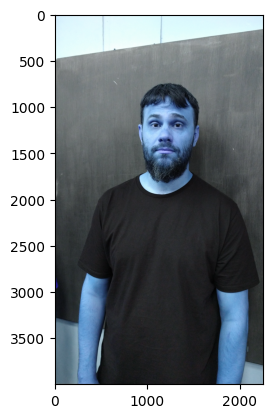

In [75]:
# 23 Comienzo interfaz de usuario, lectura de foto conteniendo una cara
# sin formato exigido

import os
import cv2
import face_recognition

# Carpeta de entrada con las imágenes
input_dir = '.\denico_input'

# Carpeta de salida para guardar los rostros recortados
output_dir = '.\denico_output'

# Load the face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Process each image in the input directory
for filename in os.listdir(input_dir):
    # Load the input image
    input_path = os.path.join(input_dir, filename)
    img = cv2.imread(input_path)

    plt.imshow(img)

    # Detect faces in the image
    face_locations = face_recognition.face_locations(img)

    # Crop the face(s) and save the result
    for (top, right, bottom, left) in face_locations:
        face = img[top:bottom, left:right]
        face = cv2.resize(face, (90, 90))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY) ##COLOR_RGB2GRAY probar

        # Save the cropped face to the output directory
        output_path = os.path.join(output_dir, f"{filename.split('.')[0]}_90.jpg")
        cv2.imwrite(output_path, face)


(1, 8100)


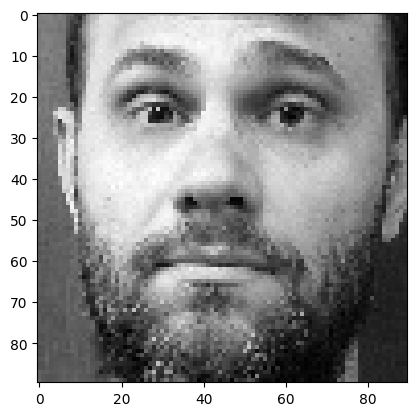

In [76]:
# 24 Lectura de la foto transformada a 90 x 90 en escala de grises

input_dir2 = '.\denico_output'

img_array = []

for filename in os.listdir(input_dir2):
    input_path = os.path.join(input_dir2, filename)
    img = cv2.imread(input_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_array.append(img)

img_array_numpy = np.array(img_array)

img_array_numpy_flatten = img_array_numpy[0,:,:].flatten()

img_array_numpy_flatten = np.array(img_array_numpy_flatten)

plt.imshow(img.reshape(90,90),cmap="gray")

img_array_numpy_flatten = img_array_numpy_flatten.astype('float64')

img_array_numpy_flatten = img_array_numpy_flatten/255.0

img_array_numpy_flatten = img_array_numpy_flatten.reshape(1,8100)

print(img_array_numpy_flatten.shape)

img_pca = pca.transform(img_array_numpy_flatten)

In [77]:
#25 Predicción de la RN de Tensorflow

print(f'Según la RN de Tensorflow, la foto corresponde a {labels_unicos_texto[np.argmax(model.predict(img_pca))]}')

1/1 [==============================] - 0s 32ms/step
Según la RN de Tensorflow, la foto corresponde a ep_


In [78]:
# 26 Predicción de la RN de Denicolay de 1 capa oculta

entrada = img_pca

# Paso las listas a numpy
X = np.array(entrada)

hidden_estimulos = W1 @ X.T + X01
hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
output_estimulos = W2 @ hidden_salidas + X02
output_salidas = func_eval_vec(output_FUNC, output_estimulos)

# calculo el error promedio general de TODOS los X
Error= np.mean( (Y.T - output_salidas)**2 )

print(f'Según la RN de Denicolay de 1 capa oculta, la foto corresponde a {labels_unicos_texto[np.argmax(output_salidas)]}')

print(f'Error medio cuadrático {Error}')

Según la RN de Denicolay de 1 capa oculta, la foto corresponde a ep_
Error medio cuadrático 0.0559716146105392


In [79]:
# 26 Predicción de la RN de Denicolay de 2 capas ocultas

entrada = img_pca

# Paso las listas a numpy
X = np.array(entrada)

hidden_dos_estimulos = A1 @ X.T + B01
hidden_dos_salidas = func_eval_vec(hidden_dos_FUNC, hidden_dos_estimulos)
hidden_dos_estimulos2 = A3 @ hidden_dos_salidas + B03
hidden_dos_salidas2 = func_eval_vec(hidden_dos_FUNC2, hidden_dos_estimulos2)
output_dos_estimulos = A2 @ hidden_dos_salidas2 + B02
output_dos_salidas_dos = func_eval_vec(output_dos_FUNC, output_dos_estimulos)

# calculo el error promedio general de TODOS los X
Error= np.mean( (Y.T - output_dos_salidas_dos)**2 )

print(f'Según la RN de Denicolay de 2 capas ocultas, la foto corresponde a {labels_unicos_texto[np.argmax(output_dos_salidas_dos)]}')

print(f'Error medio cuadrático {Error}')


Según la RN de Denicolay de 2 capas ocultas, la foto corresponde a ep_
Error medio cuadrático 0.05509225445217032
